In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


In [2]:
path = "C:/Users/danhq/Desktop/VisualProprioceptive_Analaysis/Visual-Proprioceptive/VisualProprioceptive_Data/"

In [56]:
# Analysis of the answers given after movement to the target was made (i.e. visual-proprioceptive condition)
files = os.listdir(path)

dataFrame = None 
correct = 0 #np.ones(len(files))
responseVal = 0

for i in range(len(files)):
    
    filez = "Answer" in files[i] 
        
    if filez:
        
        data = pd.read_csv(path + files[i],sep=':', header=[0,1,2])
#         data = pd.read_fwf(path + files[i],sep=':', header=[0,1,2])

#----------------------------------------------------------------------------
        fName = files[i]
        fNameS = fName.split('_')
#         print(float(fNameS[6]))
        propVal = float(fNameS[6])
    
        targPos = data.iloc[0]["Name" == "Target_Position"]
        stiPos = data.iloc[1]["Name" == "Stimulus_Position"]
        reHPos = data.iloc[2]["Name" == "RealHand_Position"]
        stzPos = data.iloc[3]["Name" == "StartZone_Position"]
        resPos = data.iloc[4]["Name" == "Response"]
        
        if "Y" in resPos:
            responseVal = 1
        else:
            responseVal = 0
        
        tp = targPos.split(',')
        sp = stiPos.split(',')
        rep = reHPos.split(',')
        szP = stzPos.split(',')

        tpf =(float(tp[2]))
        spf = (float(sp[2]))
        rpf = (float(rep[2]))
        szf = (float(szP[2]))

        diffPos = np.absolute(tpf-spf)
        realVsVirtHand = np.absolute(rpf-spf)

#         print(round(result,4))
#         print(resPos)
    
    #-------------------------------------------------
    # if the proprioceptive value is positive and the answer is yes, then that is incorrect 
    # if the proprioceptive value is negative and the answer is yes, then that is correct 

        if propVal > 0.0 and 'Y' in resPos:
            correct = 0
        if propVal < 0.0 and 'Y' in resPos:
            correct = 1
        if propVal > 0.0 and 'N'in resPos:
            correct = 1
        if propVal < 0.0 and 'N' in resPos:
            correct = 0
        if propVal == 0.0:
            correct = 2

    #-------------------------------------------------
    
        rawValues = list((tpf,spf,rpf,szf,realVsVirtHand,propVal,diffPos,resPos,correct))
        tmpValues = pd.DataFrame([rawValues],columns=['TargetPos','StimulusPos','RealHandPos','StartZone','Real2VirtHandDiff','ProprioceptiveVal','Target2StimDiff','Response','Answer'])
        
        tmpValues.insert(0, "Trial", fNameS[7][0] , True)
        tmpValues.insert(0, "Participant_ID", fNameS[2] , True)
        
        if dataFrame is None:
            dataFrame = tmpValues
        else:
            dataFrame = pd.concat((dataFrame, tmpValues)) 
    
#----------------------------------------------------------------------------       

In [147]:
# Get proprioceptive values 
proprioceptiveVals = dataFrame['ProprioceptiveVal'].unique()
proprioceptiveVals.sort()
print(proprioceptiveVals)

# Get probabilities for saying the real hand was further away than the virtual hand 
propVals = dataFrame["ProprioceptiveVal"].tolist()
answers = dataFrame["Answer"].tolist()
probabilityAhead1 = []
for i in answers:
    if i == 1:
        probabilityAhead1.append(i)
print("Probability 1 the real hand was ahead: ", np.round(len(probabilityAhead1)/len(answers),3))


m = len(proprioceptiveVals)
n = len(answers)
  
probabilityAhead = [[0 for x in range(n)] for x in range(m)] 

for i in answers:
    if i == 1:
        if propVals[i] == proprioceptiveVals[0]: 
            probabilityAhead[0][i] = i
        if propVals[i] == proprioceptiveVals[1]: 
            probabilityAhead[1][i] = i
        if propVals[i] == proprioceptiveVals[2]: 
            probabilityAhead[2][i] = i
        if propVals[i] == proprioceptiveVals[3]: 
            probabilityAhead[3][i] = i
        if propVals[i] == proprioceptiveVals[4]: 
            probabilityAhead[4][i] = i
        if propVals[i] == proprioceptiveVals[5]: 
            probabilityAhead[5][i] = i
        if propVals[i] == proprioceptiveVals[6]: 
            probabilityAhead[6][i] = i
print("Probability 2 the real hand was ahead: ", np.round(len(probabilityAhead[0])/len(answers),3))

[-0.1   -0.05  -0.025  0.     0.025  0.05   0.1  ]
Probability 1 the real hand was ahead:  0.733
Probability 2 the real hand was ahead:  1.0


In [86]:
dataFrame

,Participant_ID,Trial,TargetPos,StimulusPos,RealHandPos,StartZone,Real2VirtHandDiff,ProprioceptiveVal,Target2StimDiff,Response,Answer
0,379d850213,0,0.332,0.283,-0.110,-0.108,0.393,0.050,0.049,N,1
0,379d850213,1,0.532,0.443,-0.134,-0.108,0.577,0.000,0.089,Y,2
0,379d850213,2,0.332,0.236,-0.121,-0.108,0.357,-0.025,0.096,Y,1
0,379d850213,3,0.132,0.038,-0.081,-0.108,0.119,-0.050,0.094,Y,1
0,379d850213,4,0.132,0.094,-0.118,-0.108,0.212,0.025,0.038,N,1
...,...,...,...,...,...,...,...,...,...,...,...
0,08727a345f,3,0.332,0.314,-0.101,-0.108,0.415,0.000,0.018,N,2
0,08727a345f,3,0.332,0.335,0.315,-0.108,0.020,0.050,0.003,N,1
0,08727a345f,3,0.332,0.365,0.334,-0.108,0.031,0.025,0.033,N,1
0,59ddec312e,0,0.332,0.316,0.046,-0.108,0.270,0.000,0.016,T,2


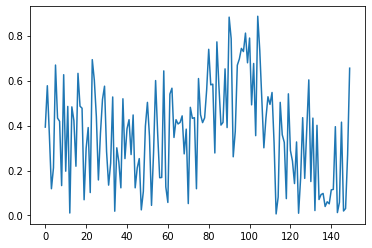

In [83]:
# Plot difference betweeen the real and virtual hand throughout the task 
r2vDiff = []
for i, row in dataFrame.iterrows():
    r2vDiff.append(row['Real2VirtHandDiff']) 
plt.plot(r2vDiff)